# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file  = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file   = './traffic-signs-data/test.p'
 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_ORIG, y_train_ORIG = train['features'], train['labels']
X_valid_ORIG, y_valid_ORIG = valid['features'], valid['labels']
X_test_ORIG,  y_test_ORIG  =  test['features'],  test['labels']

assert(len(X_train_ORIG) == len(y_train_ORIG))
assert(len(X_valid_ORIG) == len(y_valid_ORIG))
assert(len(X_test_ORIG)  == len(y_test_ORIG))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_ORIG.shape[0]
n_valid = X_valid_ORIG.shape[0]

# TODO: Number of testing examples.
n_test = X_test_ORIG.shape[0]

# TODO: What's the shape of an traffic sign image? 
image_shape = X_train_ORIG.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
# read number of classes from signnames.csv
def bufcount(filename):
    #http://stackoverflow.com/a/850962/5411817
    f = open(filename)
    lines = 0
    buf_size = 1024 * 1024
    read_f = f.read # loop optimization

    buf = read_f(buf_size)
    while buf:
        lines += buf.count('\n')
        buf = read_f(buf_size)

    return lines
# first line in datafile is classnames: ClassID, SignName 
num_classes = bufcount('./signnames.csv') - 1


print("Number of training examples   =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples    =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", num_classes)

Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Let's see how traffic sign examples are distributed across 
  the Training, Validation, and Test sets:

The distribution appears similar across the three sets, 
  though not uniform across the classes.


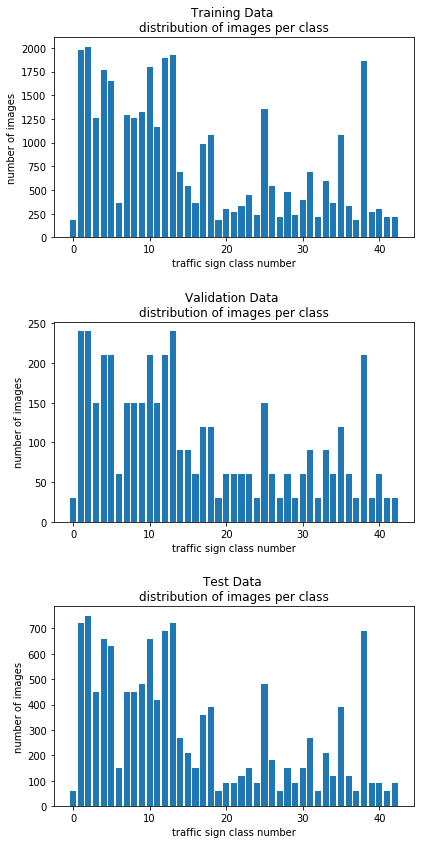

figure saved as: 'data_plotted_image_distribution_amongst_classes.png'


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Show Visualizations in the notebook.
%matplotlib inline


# SH look at training set labels. count how many images there are of each label
import numpy as np
from collections import Counter, OrderedDict

def plot_data_in_fig(data, title, fig, plot_loc):
    counts = Counter(data)
    counts = OrderedDict(sorted(counts.items()))
    counts = [counts[i] for i in range(len(counts))]

    y_data = counts
    x_data = range(len(y_data))    
    
    plt.subplot(plot_loc, title=title)
    plt.xlabel("traffic sign class number\n")
    plt.ylabel("number of images")
    plt.bar(x_data, y_data)

print("Let's see how traffic sign examples are distributed across \n  the Training, Validation, and Test sets:\n")
print("The distribution appears similar across the three sets, \n  though not uniform across the classes.")

# set figure width, height in inches   
fig1 = plt.figure(1, figsize=(6, 12))

plot_data_in_fig(y_train_ORIG, "Training Data \ndistribution of images per class",  fig1, 311)
plot_data_in_fig(y_valid_ORIG, "Validation Data \ndistribution of images per class",fig1, 312)
plot_data_in_fig(y_test_ORIG,  "Test Data \ndistribution of images per class",      fig1, 313)

# prevent overlapping of labels with subplots
plt.tight_layout()
plt.show()

# save figure to file
fig1.savefig("data_plotted_image_distribution_amongst_classes.png", dpi=25)  # results in 160x120 px image
print("figure saved as: 'data_plotted_image_distribution_amongst_classes.png'")


Sample images from training data set


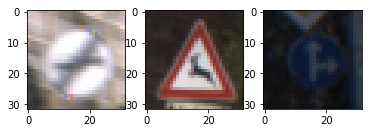

In [4]:
# diplay list of sample images from training data set
def display_images(images):
    num_channels = images[0].shape[-1]
    #print("shape 1st image", images[0].shape)
    num_images = len(images)
    #print(num_images, "num_images, num_channels:", num_channels)
    plt.figure(1)
    rows = 1
    cols = int(num_images/rows)
    for i in range(num_images):
        plt.subplot(rows, cols, i+1)
        if num_channels == 3:
            # color image
            plt.imshow(images[i])
        else:
            # assume grayscale:
            # grayscale is 3D, not 4D: it does NOT have a "num_channels==1" dimension
            # it has simple shape of (num_examples, 32, 32) as opposed to (num_examples, 32, 32, num_channels==3)
            plt.imshow(images[i], cmap = plt.get_cmap('gray'))
    plt.show()

print("Sample images from training data set")
sample_images = [X_train_ORIG[50], X_train_ORIG[500], X_train_ORIG[1000]]
display_images(sample_images)

# consider showing histogram of individual sample images
# consider showing average histogram of all images


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


converting datasets to 1D grayscale
(34799, 32, 32) (4410, 32, 32) (12630, 32, 32)


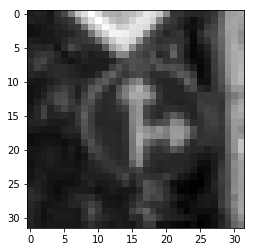

In [5]:
from skimage import color

def get_grayscale_datasets_1channel(input_datasets):
    # eg input_datasets may be: [X_train, X_valid, X_test]
    dataset_labels  = ["training", "validation", "testing"]
    output_datasets = [[], [], []]
    
    print("\nconverting datasets to 1D grayscale")

    num_datasets = len(input_datasets)
    for s in range(num_datasets):

        #print("\nconverting " +  dataset_labels[s]  + " data to grayscale")
        # set output color depth to 1
        num_images, x_pixels, y_pixels, color_depth = input_datasets[s].shape
        color_depth = 1
        output_shape = (num_images, x_pixels, y_pixels, color_depth)
        
        output_datasets[s] = color.rgb2gray(input_datasets[s])
        
        # returned grayscale image is of shape==(num_images, x-pixels, y_pixels)
        # we need to reshape to add color_depth = 1
        #print(output_datasets[s].shape, "before reshape")
        np.reshape(output_datasets[s], [num_images, 32, 32, 1])
        #print(output_datasets[s].shape, "after_reshape")
        
        ## DRAT!! in earlier tests on dummy arrays, I was able to convert [a,b,c] into [a,b,c,1]
        ## DUNNO Why it's NOT working here!! Or why it DID work earlier.
        ## TODO: FIX, or cannot run lenet on grayscale-1D. Actually, probably cannot anyway! cuz of layer reshapes.

    #print("\ndone converting to grayscale\n")
    print(output_datasets[0].shape, output_datasets[1].shape, output_datasets[2].shape)
    
    return output_datasets

# test the above proceedure
gray_train, gray_valid, gray_test = get_grayscale_datasets_1channel([X_train_ORIG, X_valid_ORIG, X_test_ORIG])
imgplot= plt.imshow(gray_train[1000], cmap = plt.get_cmap('gray'))


converting to grayscale..
(34799, 32, 32) (4410, 32, 32) (12630, 32, 32) gray single channel conversion


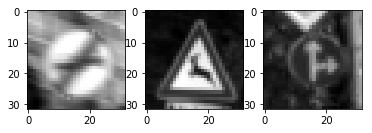

In [6]:
# turn color data into grayscale image data
from skimage import color

def get_grayscale_datasets(input_datasets):
    X_train, X_valid, X_test = input_datasets
    
    print("converting to grayscale..")
    X_train_gray = color.rgb2gray(X_train)
    X_valid_gray = color.rgb2gray(X_valid)
    X_test_gray  = color.rgb2gray(X_test)
    
    gray_image_shape = X_train_gray.shape
    print(X_train_gray.shape,X_valid_gray.shape, X_test_gray.shape, "gray single channel conversion")
    assert (gray_image_shape[1:] == (32, 32)) #32px x 32px, 1 color channel: grayscale
    
    return [X_train_gray, X_valid_gray, X_test_gray]

# test get_grayscale_datasets
X_train_gray, X_valid_gray, X_test_gray = get_grayscale_datasets([X_train_ORIG, X_valid_ORIG, X_test_ORIG])

# display sample grayscale images from dataset
display_images([X_train_gray[50], X_train_gray[500], X_train_gray[1000]])


converting datasets to 1D grayscale
(34799, 32, 32) (4410, 32, 32) (12630, 32, 32)
converted to 3 channel grayscale
(34799, 32, 32, 3) gray 3D shape


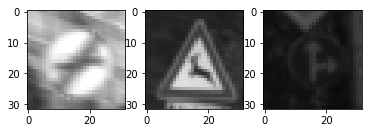

resulting images are darker and lighter than the single channel grayscale, with every ratio I've tried 
 some ratios I've tried: 1/np.sqrt(3), 2*np.sqrt(3), (R:2/6 G:3/6 B:1/6) 
 Not sure how to create a 3-channel grayscale that looks visually identical to the 1-channel grayscale


In [7]:
# turn grayscale into 3channel rgb grayscale
# (not ideal paramater-wise = duplicated data, but for shipping through my LeNet, it should remove shaping problems)

## Running rgb-Grayscales through leNet gave TERRIBLE Results !

def transform_grayscale_into_3D_grayscale(input_dataset, ratioR=1, ratioG=1, ratioB=1):
    X_train_gray, X_valid_gray, X_test_gray = input_dataset
    
    print("converted to 3 channel grayscale")
    # some ratios I've tried: 1/np.sqrt(3), 2*np.sqrt(3), 2/6 3/6 1/6
    #  sqrt(0.299 * R^2 + 0.587 * G^2 + 0.114 * B^2)

    # 3-channel gray looks different than 1-channel gray. Try to retain "look" of 1-channel gray. Find a multiplier ?
    R = X_train_gray * ratioR
    G = X_train_gray * ratioG
    B = X_train_gray * ratioB

    X_train_gray3D_2 = np.stack( (R, G, B), axis=-1)
    X_valid_gray3D_2 = np.stack( (R, G, B), axis=-1)
    X_test_gray3D_2  = np.stack( (R, G, B), axis=-1)
    print(X_train_gray3D_2.shape, "gray 3D shape")

    return [X_train_gray3D_2, X_valid_gray3D_2, X_test_gray3D_2]
    
## test above method

#input_dataset = get_grayscale_datasets([X_train, X_valid, X_test])
input_dataset = get_grayscale_datasets_1channel([X_train_ORIG, X_valid_ORIG, X_test_ORIG])
X_train_gray3D_2, X_valid_gray3D_2, X_test_gray3D_2 = transform_grayscale_into_3D_grayscale(input_dataset)
display_images([X_train_gray3D_2[50], X_train_gray3D_2[500], X_train_gray3D_2[1000]])

print("resulting images are darker and lighter than the single channel grayscale, with every ratio I've tried \n some ratios I've tried: 1/np.sqrt(3), 2*np.sqrt(3), (R:2/6 G:3/6 B:1/6) \n Not sure how to create a 3-channel grayscale that looks visually identical to the 1-channel grayscale")

In [8]:
# Try per channel zero centering. Find mean for each channel, where the mean for that channel is across all training images
# !! TERRIBLE RESULTS. tried a few learning_rates. NIX This technique !
from sklearn.preprocessing import normalize

def get_per_channel_mean_zero_centered_datasets(input_datasets):
    
    def separate_channels(images):
        # returns 2-D array: (num_examples, total_num_pixels)
        R = images[:,:,:,0].reshape(len(images),-1)
        G = images[:,:,:,1].reshape(len(images),-1)
        B = images[:,:,:,2].reshape(len(images),-1)
        return [R,G,B]

    def combine_channels(channels, output_shape):
        # used to re-combine separated RGB channels into 4-D array, where channels are the 4thD
        return np.stack(channels, axis=-1).reshape(output_shape)

    X_train, X_valid, X_test = input_datasets[0]
    
    initial_shape = X_train.shape
    R, G, B = separate_channels(X_train)

    r_pixels_mean = np.mean(R)
    g_pixels_mean = np.mean(G)
    b_pixels_mean = np.mean(B)

    # Must Save These Values, and apply to valid and test sets
    TRAINING_PIXELS_MEAN = [r_pixels_mean, g_pixels_mean, b_pixels_mean]
    print("TRAINING_PIXELS_MEAN\n", TRAINING_PIXELS_MEAN)


    #apply the same TRAINING_PIXELS_MEAN to: train, validation and test sets
    sets = [X_train, X_valid, X_test]
    zero_centered = [np.zeros(X_test.shape), np.zeros(X_valid.shape), np.zeros(X_test.shape)]

    for set in range(len(sets)):
        initial_shape = sets[set].shape
        R, G, B = separate_channels(sets[set])
        channels = [R, G, B]
        for c in range(len(channels)):
            channel = channels[c]
            channel = channel.astype(np.float64, copy=False)
            channel -= TRAINING_PIXELS_MEAN[c]
            channel = channel/TRAINING_PIXELS_MEAN[c]
        zero_centered[set] = combine_channels(channels, initial_shape)
    # end for loop

    #X_train_per_channel_mean_zero_centered = zero_centered[0]
    #X_valid_per_channel_mean_zero_centered = zero_centered[1]
    #X_test_per_channel_mean_zero_centered  = zero_centered[2]

    print(zero_centered[0].shape, zero_centered[1].shape, zero_centered[2].shape)
    return zero_centered



In [9]:
# Try per image zero centering. Find mean for each image, apply that mean to each channel in said image

def get_per_image_mean_centered_datasets(X_input_datasets):
    # ie datasets = [X_train, X_valid, X_test]
    X_output_datasets = [[], [], []] #np.empty(len(datasets))

    for s in range(len(X_input_datasets)):
        setX = X_input_datasets[s]
        initial_shape = setX.shape
        num_images = initial_shape[0]

        # returns new copy with shape [num_images, num_pixels]
        X_output_datasets[s] = setX.reshape(num_images,-1)
        num_pixels = X_output_datasets[s].shape[-1]
        
        # for accurate calculation of mean
        X_output_datasets[s].astype(np.float64, copy=False)

        # axis=1 averages all pixels in a single image; dtype=np.float64 for accuracy
        divide_by_zero_prevention = 0   #.00000000001
        image_mean = np.mean(X_output_datasets[s], axis=1, dtype=np.float64) + divide_by_zero_prevention

        # copy/create matrix such that each image has num_pixels all set equal to the image's mean
        image_mean_xl = np.empty([num_images, num_pixels], dtype=np.float64)
 
        for i in range(num_images):
            imean = image_mean[i].astype(np.float64)
           
            # pure black image should not be in the dataset, but JustInCase.. divide by zero prevention
            if (imean == 0):
                # smallest non-zero positive number    #np.nextafter(0, 1)   #1e-20
                imean = np.nextafter(np.image_mean.dtype.type(0), np.image_mean.dtype.type(1))
            image_mean_xl[i].fill(imean)

        
        # center the data (-1, 1) by subtracting and dividing the image by its mean
        X_output_datasets[s] = (X_output_datasets[s] - image_mean_xl) / image_mean_xl
        
        # restore to orig shape
        X_output_datasets[s] = X_output_datasets[s].reshape(initial_shape)

    return X_output_datasets


In [10]:
# define training variables, constants

EPOCHS = 100
BATCH_SIZE = 128

def filter_size(in_size, out_size, stride):
    assert(padding == "VALID")
    return (in_size+1) - (out_size*stride)

def output_size(in_size, filter_size, stride):
    #(W−F+2P)/S+1
    assert(padding == "VALID")
    pad = 0
    return 1 + (in_size-filter_size+2*pad)/stride

padding = "VALID"
stride = 1
strides = [1, stride, stride, 1]
pool_stride = 2
pool_strides = [1, pool_stride, pool_stride, 1]
ksize = pool_strides


### Model Architecture

In [11]:
"""
# This was for an attempt at running LeNet on 1-channel grayscale images. 
#    Given various filter shapes, calculate output shape
#    Unsuccessful.

def get_conv_layer_given_filter_shape(x, filter_shape):
    input_height,  input_width,  input_depth  = x.get_shape().as_list()[1:]
    filter_height, filter_width = filter_shape

    output_height = output_size(input_height, filter_height, stride)
    output_width  = output_size(input_width,  filter_width,  stride)
    output_depth  = input_depth
    print("output_size", x , output_height)

    weights_shape  = [filter_height, filter_width, input_depth, output_depth]
    bias_shape     = [output_depth]

    # initialize weights
    filter_weights = tf.Variable(tf.truncated_normal(weights_shape, mean=mu, stddev=sigma))
    filter_bias    = tf.Variable(tf.zeros(bias_shape))

    conv_layer = tf.nn.conv2d(x, filter_weights, strides, padding) + filter_bias
    print("conv output shape:", conv_layer.get_shape().as_list()[1:])

    # Activation
    conv_layer = tf.nn.relu(conv_layer)

    # Pooling (28,28,6?) --> (14,14,?6)
    input_height,  input_width,  input_depth  = conv_layer.get_shape()[1:]

    ksize = [1, 2, 2, 1]
    pool_strides = ksize
    conv_layer = tf.nn.max_pool(conv_layer, ksize, pool_strides, padding)
    print("pool_output_shape: ", conv_layer.get_shape().as_list()[1:] )

    return conv_layer
""" 
;

''

In [12]:
def get_conv_layer(x, conv_output_shape, pool_output_shape):
    input_height,  input_width,  input_depth  = x.get_shape().as_list()[1:]
    output_height, output_width, output_depth = conv_output_shape  #(28, 28, 6)

    filter_height = filter_size(input_height, output_height, stride)
    filter_width  = filter_size(input_width,  output_width,  stride)

    weights_shape  = [filter_height, filter_width, input_depth, output_depth]
    bias_shape     = [output_depth]

    # initialize weights
    filter_weights = tf.Variable(tf.truncated_normal(weights_shape, mean=mu, stddev=sigma))
    filter_bias    = tf.Variable(tf.zeros(bias_shape))

    conv_layer = tf.nn.conv2d(x, filter_weights, strides, padding) + filter_bias

    #print(conv_output_shape, "=?=", conv_layer.get_shape().as_list()[1:])
    assert( conv_output_shape == conv_layer.get_shape().as_list()[1:])

    # Activation
    conv_layer = tf.nn.relu(conv_layer)

    # Pooling (28,28,6?) --> (14,14,?6)
    input_height,  input_width,  input_depth  = conv_layer.get_shape()[1:]
    output_height, output_width, output_depth = pool_output_shape          #(14, 14, input_depth)

    ksize = [1, 2, 2, 1]
    pool_strides = ksize
    conv_layer = tf.nn.max_pool(conv_layer, ksize, pool_strides, padding)
    
    #print( pool_output_shape, "=?=", conv_layer.get_shape().as_list()[1:] )
    assert( pool_output_shape == conv_layer.get_shape().as_list()[1:] )

    return conv_layer


In [13]:
def get_fcc_layer(prev_layer, output_length):
    input_length  = prev_layer.get_shape().as_list()[1]
    weights_shape = [input_length, output_length]
    bias_shape    = [output_length]
    #print(weights_shape, bias_shape, "get_fcc_layer: input_shape, output_shape")

    fcc_weights = tf.Variable(tf.truncated_normal(weights_shape, mean=mu, stddev=sigma))
    fcc_bias    = tf.Variable(tf.zeros(bias_shape))

    fcc_layer = tf.add(tf.matmul(prev_layer, fcc_weights), fcc_bias)
    assert([output_length] == fcc_layer.get_shape().as_list()[1:])

    return fcc_layer

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    if x.get_shape()[-1] == 3:
        layer1 = get_conv_layer(x, [28,28,6], [14,14,6])
        layer2 = get_conv_layer(layer1, [10,10,16], [5,5,16])
    #elif x.get_shape()[-1] == 1:
    #    layer1 = get_conv_layer_given_filter_shape(     x, [3,3])
    #    layer2 = get_conv_layer_given_filter_shape(layer1, [3,3])
    else: print("error: images should be 1d or 3d")
    
    flattened = tf.contrib.layers.flatten(layer2)
    
    layer3 = get_fcc_layer(flattened, 120)
    layer3 = tf.nn.relu(layer3)
    layer3 = tf.nn.dropout(layer3, keep_probability)
    # maybe try dropout layer

    layer4 = get_fcc_layer(layer3, 84)
    layer4 = tf.nn.relu(layer4)
    # maybe try dropout layer
    layer4 = tf.nn.dropout(layer4, keep_probability)
    
    logits = get_fcc_layer(layer4, num_classes)
    assert( [logits.get_shape().as_list()[1] ] == [num_classes])

    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [16]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import tensorflow as tf

# images as imported are already sized properly for leNet at (32x32)
assert ((X_train_ORIG.shape[1],X_train_ORIG.shape[2]) == (32, 32))  #32px x 32px, 3 color channels:RGB

# shuffle data
X_train_SHUFFLED, y_train_SHUFFLED = shuffle(X_train_ORIG, y_train_ORIG)
X_valid_SHUFFLED, y_valid_SHUFFLED = shuffle(X_valid_ORIG, y_valid_ORIG)
    # don't need to shuffle test data


In [17]:
## initialize

input_dataset = [X_train_SHUFFLED, X_valid_SHUFFLED, X_test_ORIG]

# choose which pre-processor to work with:

# X_train, X_valid, X_test = get_grayscale_datasets_1channel(input_dataset)              # must convert to 3D to use LeNet
# X_train, X_valid, X_test = get_grayscale_datasets(input_dataset)                       # must convert to 3D to use LeNet
# X_train, X_valid, X_test = transform_grayscale_into_3D_grayscale(get_grayscale_datasets(input_dataset)) # Got TERRIBLE RESULTS
# X_train, X_valid, X_test = get_per_channel_mean_zero_centered_datasets(input_dataset)  # Got TERRIBLE RESULTS
X_train, X_valid, X_test = get_per_image_mean_centered_datasets(input_dataset)


# labels do not get pre-processed
y_train, y_valid, y_test = [y_train_SHUFFLED, y_valid_SHUFFLED, y_test_ORIG]



# decide on a set training paramaters:
mu = 0
sigma = 0.01  #0.1   #.018  #.018 = 1.0/np.sqrt(pixels_x * pixels_y * color_depth) = 1/sqrt(32*32*3) = 1/55 = .018;  bw: 1/sqrt(32*32*1) = 1/32 = 0.03125
learning_rate = .001 #0.01


# determine placeholder paramater values based on chosen (preprocessor) # (dataset in grayscale, or rgb format)
image_shape = X_train.shape
if len(image_shape) == 3:
    # bw image needs re-shaped to add a color depth of 1
    print("oops, bw datasets need to be reshaped to add a color depth of 1")
assert( len(image_shape) == 4 )
pixels_x, pixels_y, color_depth = image_shape[1:]

# probability of saving the node: Training Set: 0.5 (DROPOUT_ON  = 0.5)
#           NO DROPOUT ON: Valid, Test Sets!! : 1.0 (DROPOUT_OFF = 1.0)
DROPOUT_OFF = 1.0  #(dropout_keep_probability == 1.0 : keep everything)
DROPOUT_ON  = 0.5  #(dropout_keep_probability == 0.5 : randomly set half the nodes weights to zero)


# initialize tf training variables !!
# features, labels
x = tf.placeholder(tf.float32, (None, pixels_x, pixels_y, color_depth))
y = tf.placeholder(tf.int64, (None))

keep_probability = tf.placeholder(tf.float32)


# run leNet
logits = LeNet(x)

# loss
#   tf.nn.sparse_softmax_cross_entropy_with_logits combines:
#   1) softmax with 2) cross_entropy and 3)(sparce version) performs one-hot encoding to the labels, y
cross_entropy  = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y)  #labels
loss_operation = tf.reduce_mean(cross_entropy)

# train
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

# accuracy
model_prediction = tf.argmax(logits, 1)
prediction_is_correct = tf.equal(model_prediction, y)#labels)
accuracy_calculation  = tf.reduce_mean(tf.cast(prediction_is_correct, tf.float32))

# save batch loss and accuracy results to visually plot how the model performed
training_stats = []

In [18]:
# evaluation routine
def evaluate_data(X_data, y_data):
    print("evaluating..")
    sess = tf.get_default_session()
    total_loss = 0
    total_accuracy = 0
    
    num_samples = len(X_data)
    for batch_start in range(0, num_samples, BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        X_batch = X_data[batch_start:batch_end]
        y_batch = y_data[batch_start:batch_end]
        
        accuracy, loss = sess.run([accuracy_calculation, loss_operation],
                                  feed_dict = {x:X_batch, y:y_batch, keep_probability: DROPOUT_OFF})
        
        this_batch_size = len(X_batch)
        
        total_accuracy += this_batch_size * accuracy
        total_loss     += this_batch_size * loss
        
    total_accuracy = total_accuracy / num_samples
    total_loss = total_loss / num_samples
        
    return total_accuracy, total_loss     


SyntaxError: invalid syntax (<ipython-input-18-4ae4611833e6>, line 15)

In [ ]:
import time

# train our model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    training_stats = []
    
    print("Training...\n")
    for i in range(EPOCHS):
        print("EPOCH: ", i+1, "of", EPOCHS, "EPOCHS")
        X_train, y_train = shuffle(X_train, y_train)
        t0 = time.time()
        for batch_start in range(0, num_examples, BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            features = X_train[batch_start:batch_end]
            labels   = y_train[batch_start:batch_end]
            #train
            sess.run(training_operation, feed_dict = {x:features, y:labels, keep_probability: DROPOUT_ON})
            if batch_start % 100 == 0:
                print("        batch ", 1+batch_start//BATCH_SIZE, "of ", 1 + int(num_examples/BATCH_SIZE))#, "batches,  on EPOCH", i+1, "of", EPOCHS, "EPOCHS")
                      
        # evaluate on validation set, and print results of model from this EPOCH
        print(X_valid.shape)
        validation_accuracy, validation_loss = evaluate_data(X_valid, y_valid)
        training_accuracy,   training_loss = evaluate_data(X_train, y_train)
        
        # TODO: would be awesome to display live charts of these results, rather than this text output 
        #      (see charts in next cell)
        print("Time: {:.3f} minutes".format(float( (time.time()-t0) / 60 )))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print(" (Training Loss = {:.3f})".format(training_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print(" (Training Accuracy = {:.3f})".format(training_accuracy))
        print()
        
        # round to nearest even number at 4th decimal place
        #training_stats.append([np.around(validation_loss,4), np.around(training_loss,4), np.around(validation_accuracy,4), np.around(training_accuracy,4)])
        training_stats.append([validation_loss, training_loss, validation_accuracy, training_accuracy])
        np.savetxt('training_stats.tmp.txt', training_stats)
        
    model_timestamp = time.strftime("%y%m%d_%H%M")
    filename = 'training_stats-' + model_timestamp + '.txt'
    np.savetxt(filename, training_stats)
    print("\ntraining_stats Saved As: ", filename, "\n")    

    # save trained model
    print("Saving model..")
    saver = tf.train.Saver()
    saver.save(sess, './trained_models/sh_trained_traffic_sign_classifier-' + model_timestamp)
    print("Model Saved")
    print()

    if validation_accuracy >= 0.93:
        print(" !! Congratulations!! Your model meets the minimum required Validation Accuracy of 0.93")
        print("   You may now run your model on the Test Set :-)")
    else:
        print("KEEP WORKING ON YOUR MODEL to acheive a minimum Validation Accuracy of 0.93")
        print("underfitting if:  low accuracy on training and low accuracy on validation sets.")
        print("overfitting  if: high accuracy on training but low accuracy on validation sets.")

    print()

    


In [ ]:
# TODO plot chart of training stats: plot changing loss and validation rates for both training and validation sets

# to display legend
import matplotlib.patches as mpatches

# Read the array from disk
#training_stats_read_from_disk = np.loadtxt('training_stats.txt')
# IF read a model from disk, must also set model_timestamp associated with the filename !! else will run into error saving the figure
#print training_stats_read_from.shape

num_epochs = len(training_stats)
vloss, tloss, vaccu, taccu = [[],[],[],[]]
epoch_x_axis = range(1, num_epochs+1)
for i in range(len(training_stats)):
    vloss.append(training_stats[i][0])
    tloss.append(training_stats[i][1])
    vaccu.append(training_stats[i][2])
    taccu.append(training_stats[i][3])

# figure size in inches: width, height    
fig = plt.figure(1, figsize=(7, 7))

# to display legend
blue_patch  = mpatches.Patch(color='blue',  label='Validation Set')
red_patch   = mpatches.Patch(color='black', label='Training Set')
black_patch = mpatches.Patch(color='red',   label='Minimum 93.00% Validation Accuracy Required')

plt.subplot(311, title = "Loss")
plt.plot(epoch_x_axis, vloss, 'b', epoch_x_axis, tloss, 'k')

plt.subplot(313, title="Accuracy")
req_accuracy = 0.9300
plt.plot(epoch_x_axis, vaccu, 'b', epoch_x_axis, taccu, 'k')
plt.axhline(req_accuracy, color='r')

# overlay legend on "Accuracy" (the most spacious) subplot
plt.legend(handles=[blue_patch, black_patch, red_patch])

# zoomed in accuracy plot, highlighting variance around req_accuracy
plt.subplot(312, title="Accuracy, zoomed in")
plt.plot(epoch_x_axis, vaccu, 'b', epoch_x_axis, taccu, 'k')
plt.axhline(req_accuracy, color='r')
plt.ylim((.9000, 1.0100))

# prevent overlapping of labels with subplots
plt.tight_layout()
plt.show()

    
# model_timestamp = time.strftime("%y%m%d_%H%M")
# model_timestamp for figure should match the timestamp from the model's file, not the current timestamp (see prev cell and top of this cell)
filename = 'training_stats_plotted-' + model_timestamp + '.png'

fig.savefig(filename, dpi=25)  # results in 160x120 px image
print("Figure saved as " + filename + "\n")

In [ ]:
## Compare Models
# load figure training_stats_plotted-170327_1518.png
# Model Architecture:
#  - Lenet5: no dropout, no augmentantion, 
#  - Pre-proccessing: per image mean centered (-1,1) (not standardized though)
# Comment on figure/training/model:
#  Achieved required accuracy, but..
#  -- the loss chart shows that our model is overfitting to the training data:
#  -- as the training achieves 0% loss, the loss on validation set instead increases
#  Two methods to reduce overfitting are:
#  - add dropout layers: 
#  -- after the first fcc_layer, or after the firtst and second fcc_layers.
#  -- good dropout value is generally .5 (keep_prob = 0.5)
#  - augment the training data:
#  -- on each batch, add a random rotation, zoom, color-cast/brightness, shift image up or down, etc to the entire batch
#  Also, it seems that the learning rate could be decreased partway through training
#  - not too bad on this model (was Very apparent on another model)
#  -- as the accuracy seems to level out, but Oscillate once it's leveled out,
#  -- I wonder if lowering the training rate at that point would be useful.
#  -- maybe something that monitors the  accuracy, and notices once it's rather flat, but oscillates, then it can 
#  -- automatically decrease the learning rate by some set amount. Perhaps divide by 10 ?
#  -- Dunno, But this oscillation appears to me to be a symptom of yaking too large a step. Great at first, but then
#  -- as it hones in to a minimum, decreasing the step size may enable it to land at said assumed minimum. ??
#  -- This could be a good experiment to try.

## Add Dropouts after fcc_3 and fcc_4, with keep_probability = 0.5
# load figure training_stats_plotted-??????????.png
# Model Architecture:
#  - Lenet5: added dropout to previous architecture. No augmentantion, 
#  - Pre-proccessing (same as previous model): per image mean centered (-1,1) (not standardized though)

## Add randomized Augmentation to each batch (generate randomize settings, apply that settting to entire batch of images)
# load figure training_stats_plotted-??????????.png
# Model Architecture:
#  - Lenet5: added augmentation to previous architecture.
#  - Pre-proccessing (same as previous model): per image mean centered (-1,1) (not standardized though)


In [ ]:
## STOP !! Do NOT Proceed Until Model is FINISHED and has Validation >= 93%

    # underfitting if:  low accuracy on training and validation sets.
    # overfitting  if: high accuracy on training but low accuracy on validation sets.

assert (validation_accuracy >= 0.9300)
assert ('yes' == 'no')

In [ ]:
# test the trained model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate_data(X_test, y_test)
    print(test_accuracy)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
#assert ('yes' == 'no')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# SH TODO: Load Saved Model
# # save trained model
# print("Saving model..")
# saver = tf.train.Saver()
# saver.save(sess, './sh_trained_traffic_sign_classifier')
# print("Model Saved")
# print()

#saver.restore(sess, './sh_trained_traffic_sign_classifier-170327_1518')

# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.')) 



In [ ]:
import numpy as np
import glob
from scipy import misc

# img = Image.open('visualize_cnn.png')
# arr8 = np.array(img.getdata(),
#                     np.uint8).reshape(img.size[1], img.size[0], 3)

paths = ['traffic_signs_from_web/32x32x3/1_straightforward_IN_signnames/*.jpg',
         'traffic_signs_from_web/32x32x3/2_tricky_and_NOT_in_signnames/*.jpg',
         'traffic_signs_from_web/32x32x3/3_difficult_NOT_in_signnames/*.jpg'
        ]

num_datasets = len(paths)
datasets = []
for s in range(num_datasets):
    dataset = []
    for image_path in glob.glob(paths[s]):
        dataset.append(misc.imread(image_path))    

    dataset = np.asarray(dataset)
    print(dataset.shape)
    display_images(dataset)
    
    datasets.append(dataset)

print('Importing done...', len(datasets))


In [ ]:
# pre-process images

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [ ]:
### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, dropout_keep_prob : DROPOUT_OFF})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 